In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# All data

In [3]:
with open('../Machine_Learning/Results/test_results_all.pkl', 'rb') as f:
    test_results = pickle.load(f)

In [4]:
df_embedded_all = pd.read_pickle('data/df_all_embedded')

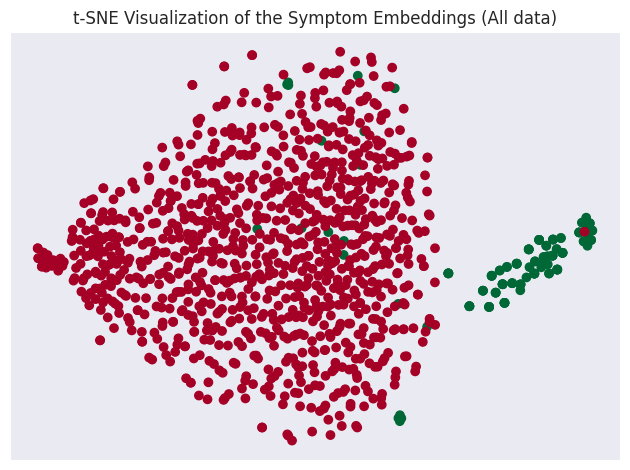

In [5]:
# Create a t-SNE visualization of the symptom columns
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

embedding_cols = []
for col in df_embedded_all.columns:
    if 'symptom_embedding_' in col:
        embedding_cols.append(col)

assert(len(embedding_cols) == 50)

tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df_embedded_all[embedding_cols])

# Create a scatter plot of the t-SNE embeddings
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df_embedded_all['y_true'], cmap='RdYlGn')
plt.title('t-SNE Visualization of the Symptom Embeddings (All data)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_visualization_all.pdf')
plt.show()

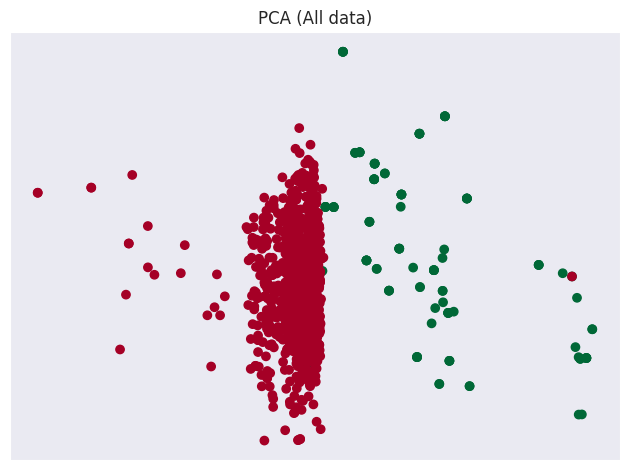

In [13]:
from sklearn.decomposition import PCA

pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df_embedded_all[embedding_cols])

# Create a scatter plot of the PCA embeddings
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df_embedded_all['y_true'], cmap='RdYlGn')
plt.title('PCA (All data)')
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.tight_layout()
plt.savefig('../Plots/Embeddings/pca_visualization_all.pdf')
plt.show()

In [10]:
data_pred_all = []

for name, result in test_results.items():
    for metric, score in result["Test Scores"].items():
        data_pred_all.append({
            "Classifier": name,
            "Metric": metric,
            "Score": score
        })

df_pred_all = pd.DataFrame(data_pred_all)

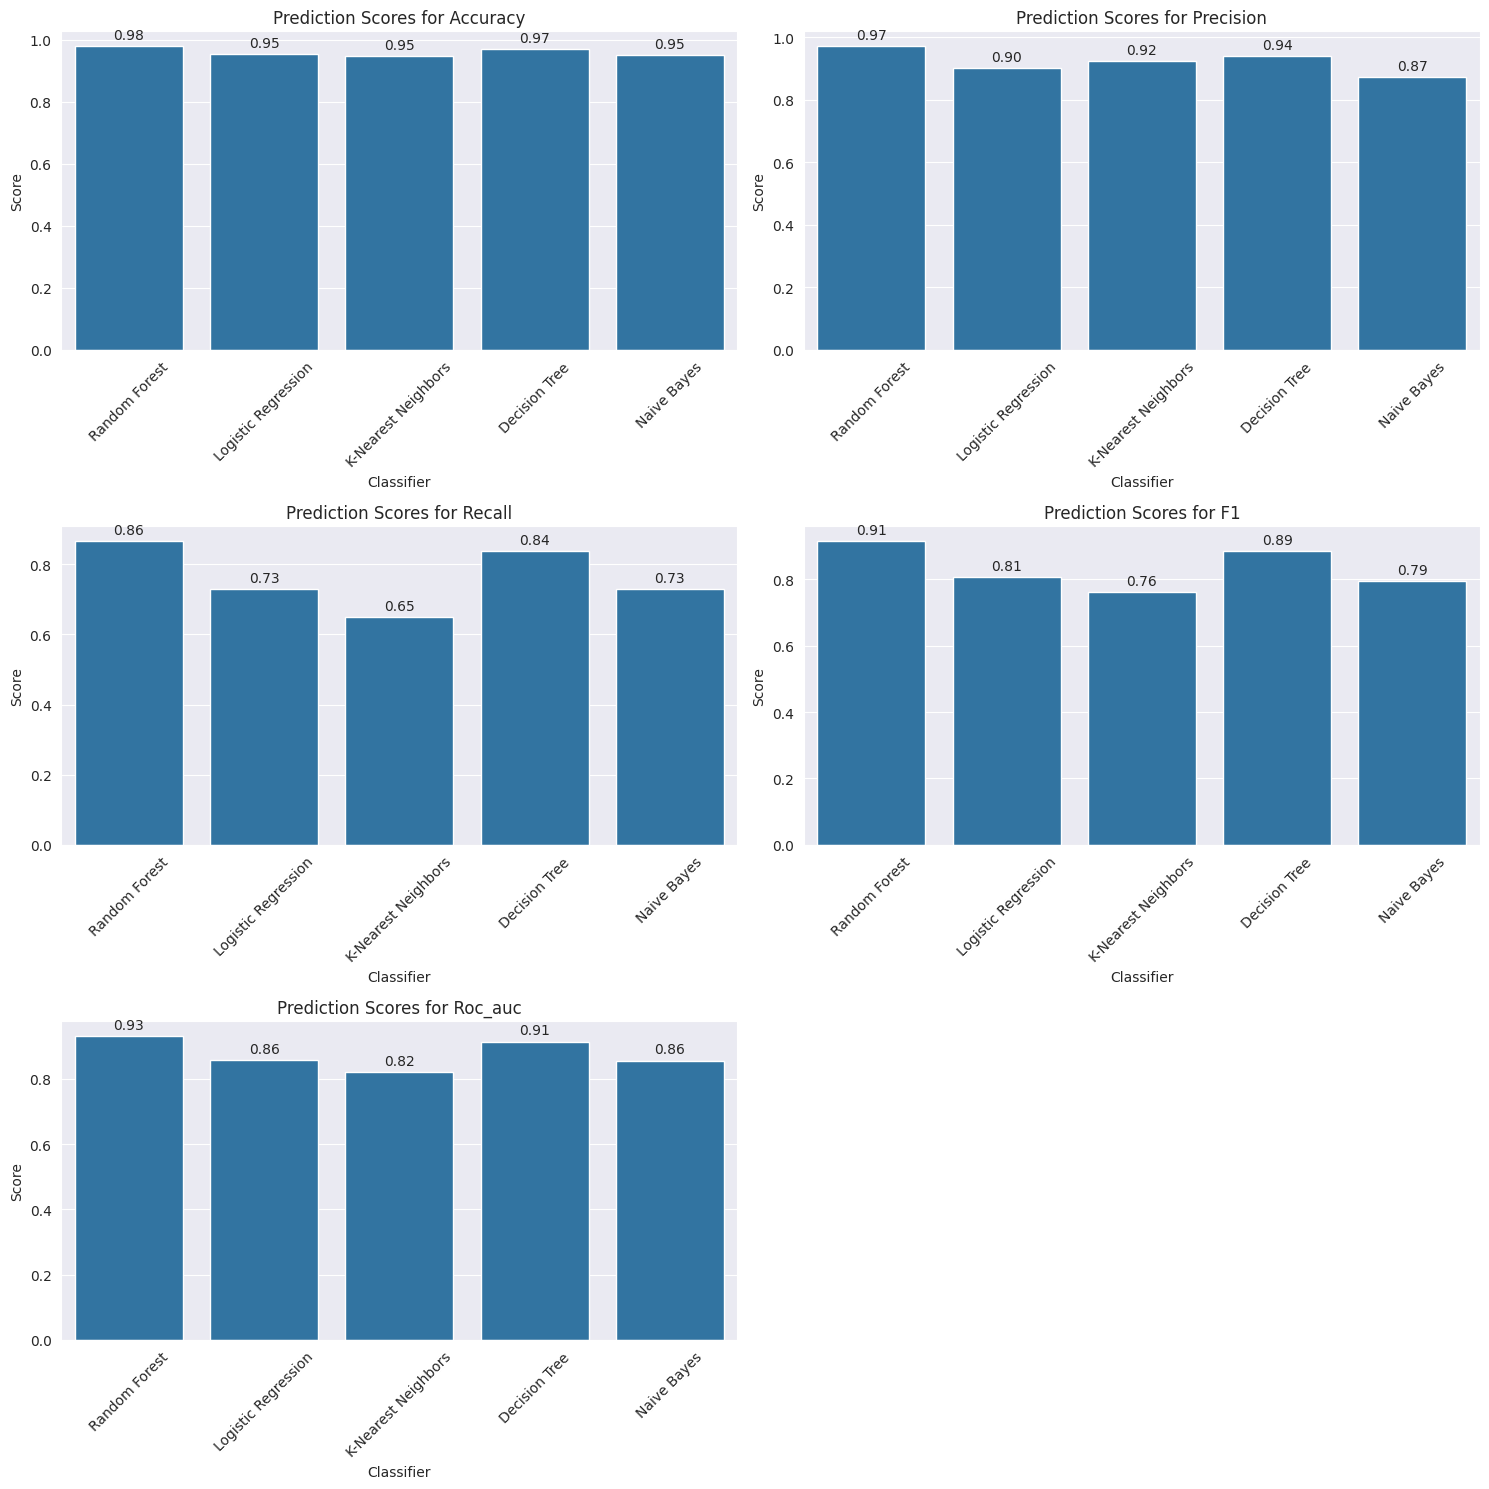

In [82]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df_pred_all[df_pred_all["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Prediction Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_all_pred.pdf')
#plt.show()


# With unique symptoms in train und test

## 5% True labels

In [3]:
with open('../Machine_Learning/Results/test_results_5.pkl', 'rb') as f:
    test_results = pickle.load(f)

In [4]:
data_pred5 = []

for name, result in test_results.items():
    for metric, score in result["Test Scores"].items():
        data_pred5.append({
            "Classifier": name,
            "Metric": metric,
            "Score": score
        })

df_pred5 = pd.DataFrame(data_pred5)

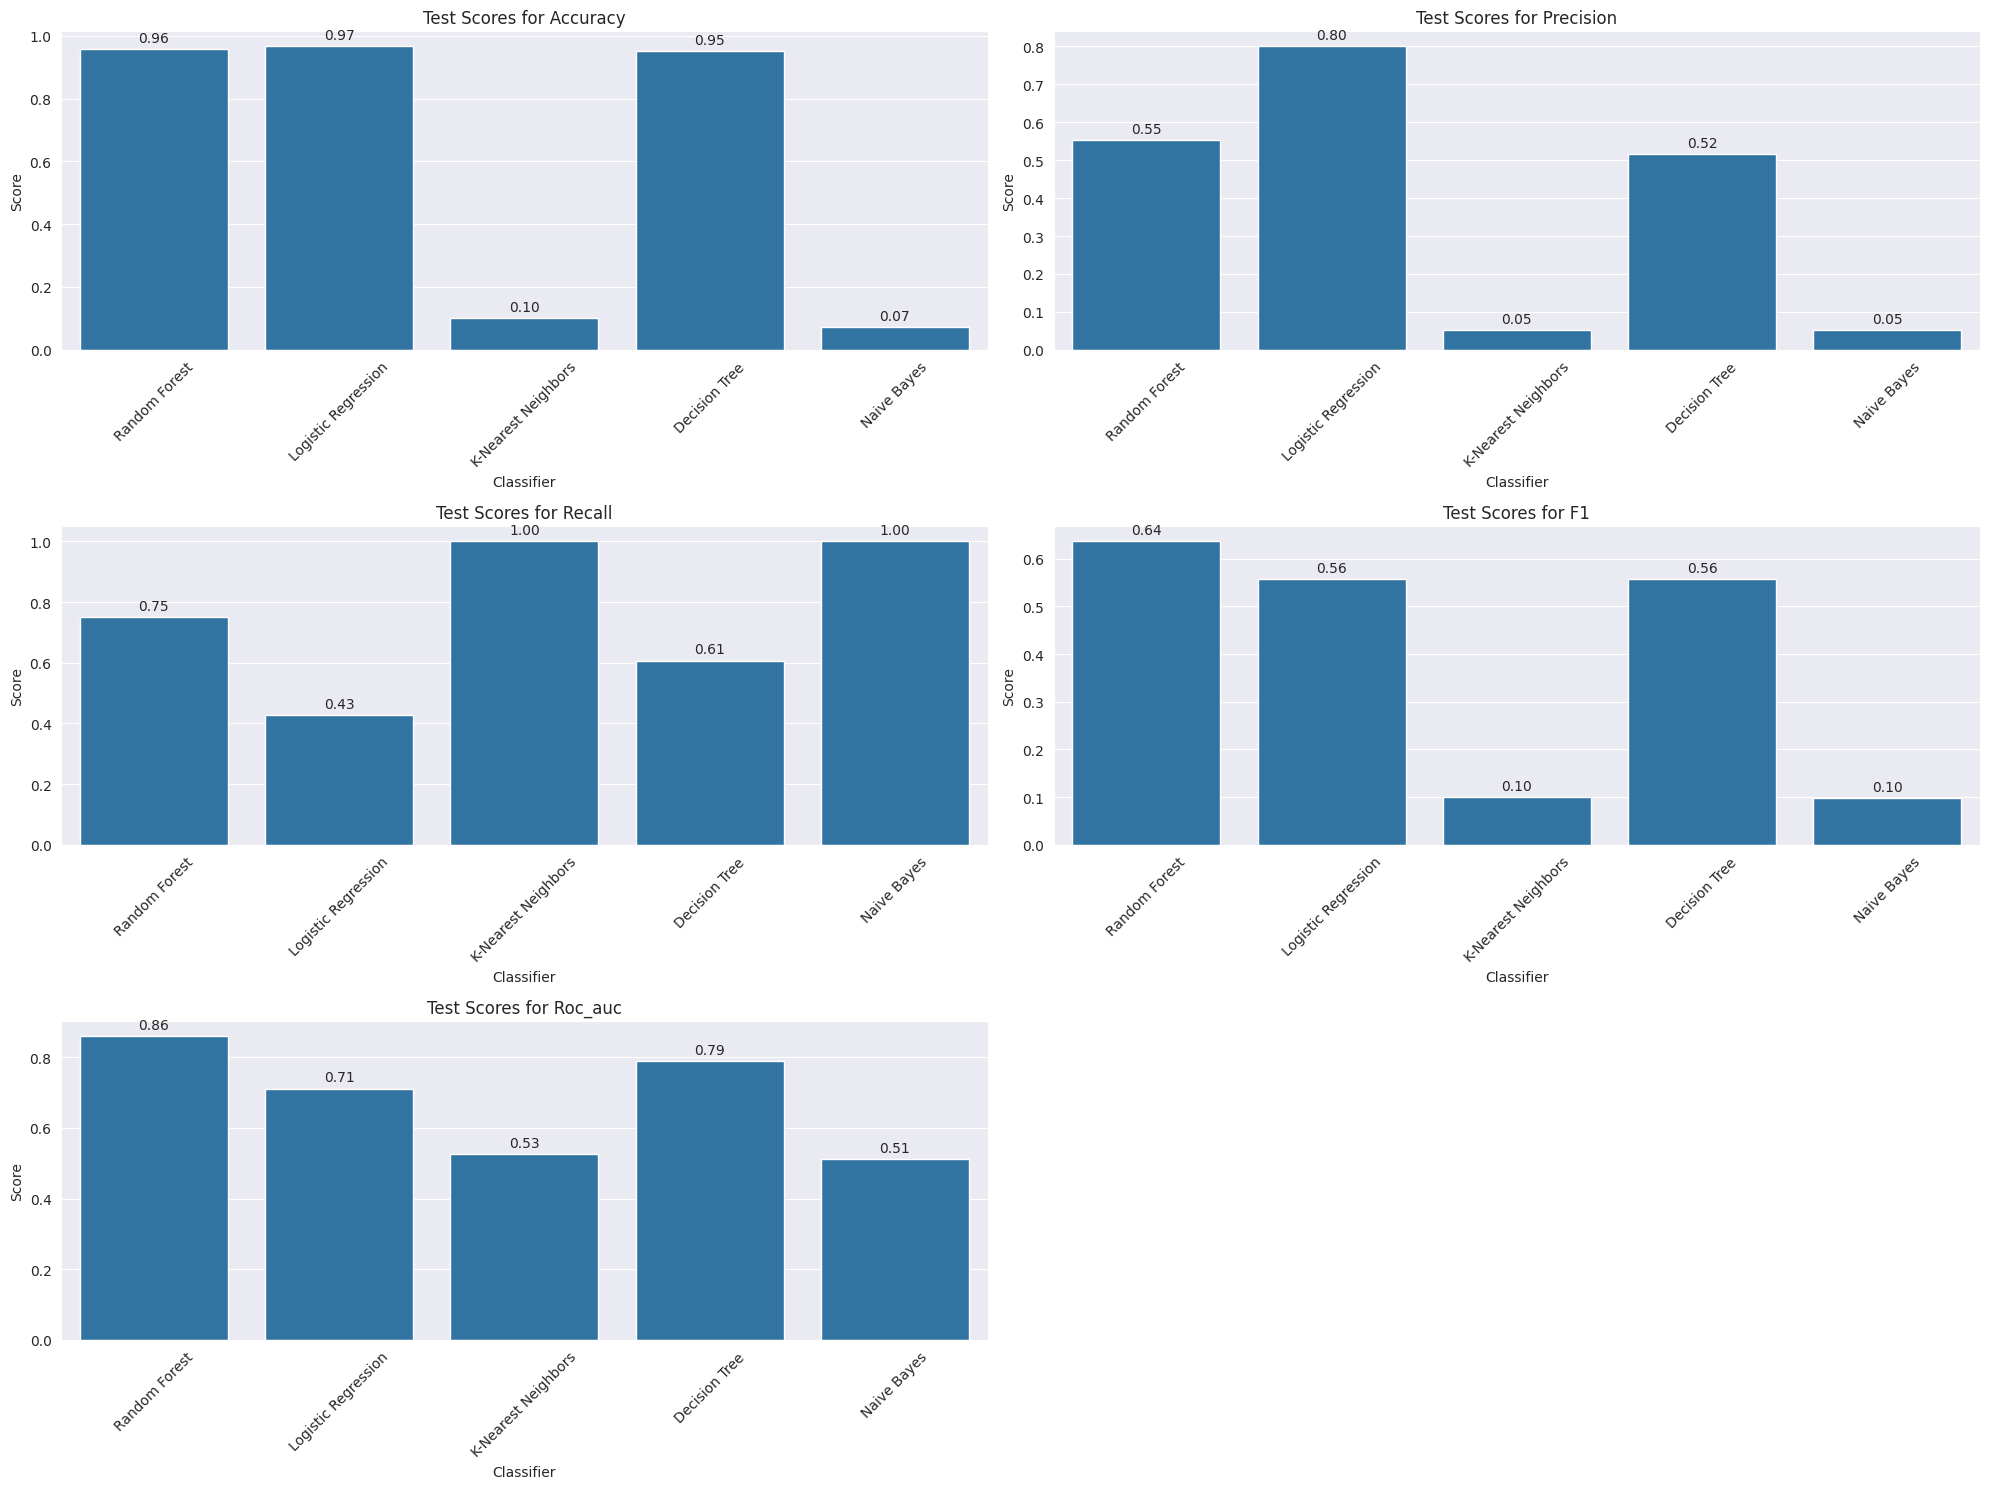

In [21]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = df_pred5[df_pred5["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Test Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_unique_5_pred.pdf')
#plt.show()


## 10% True labels

In [22]:
with open('../Machine_Learning/Results/test_results_10.pkl', 'rb') as f:
    test_results = pickle.load(f)

In [23]:
data_pred10 = []

for name, result in test_results.items():
    for metric, score in result["Test Scores"].items():
        data_pred10.append({
            "Classifier": name,
            "Metric": metric,
            "Score": score
        })

df_pred10 = pd.DataFrame(data_pred10)

accuracy
precision
recall
f1
roc_auc


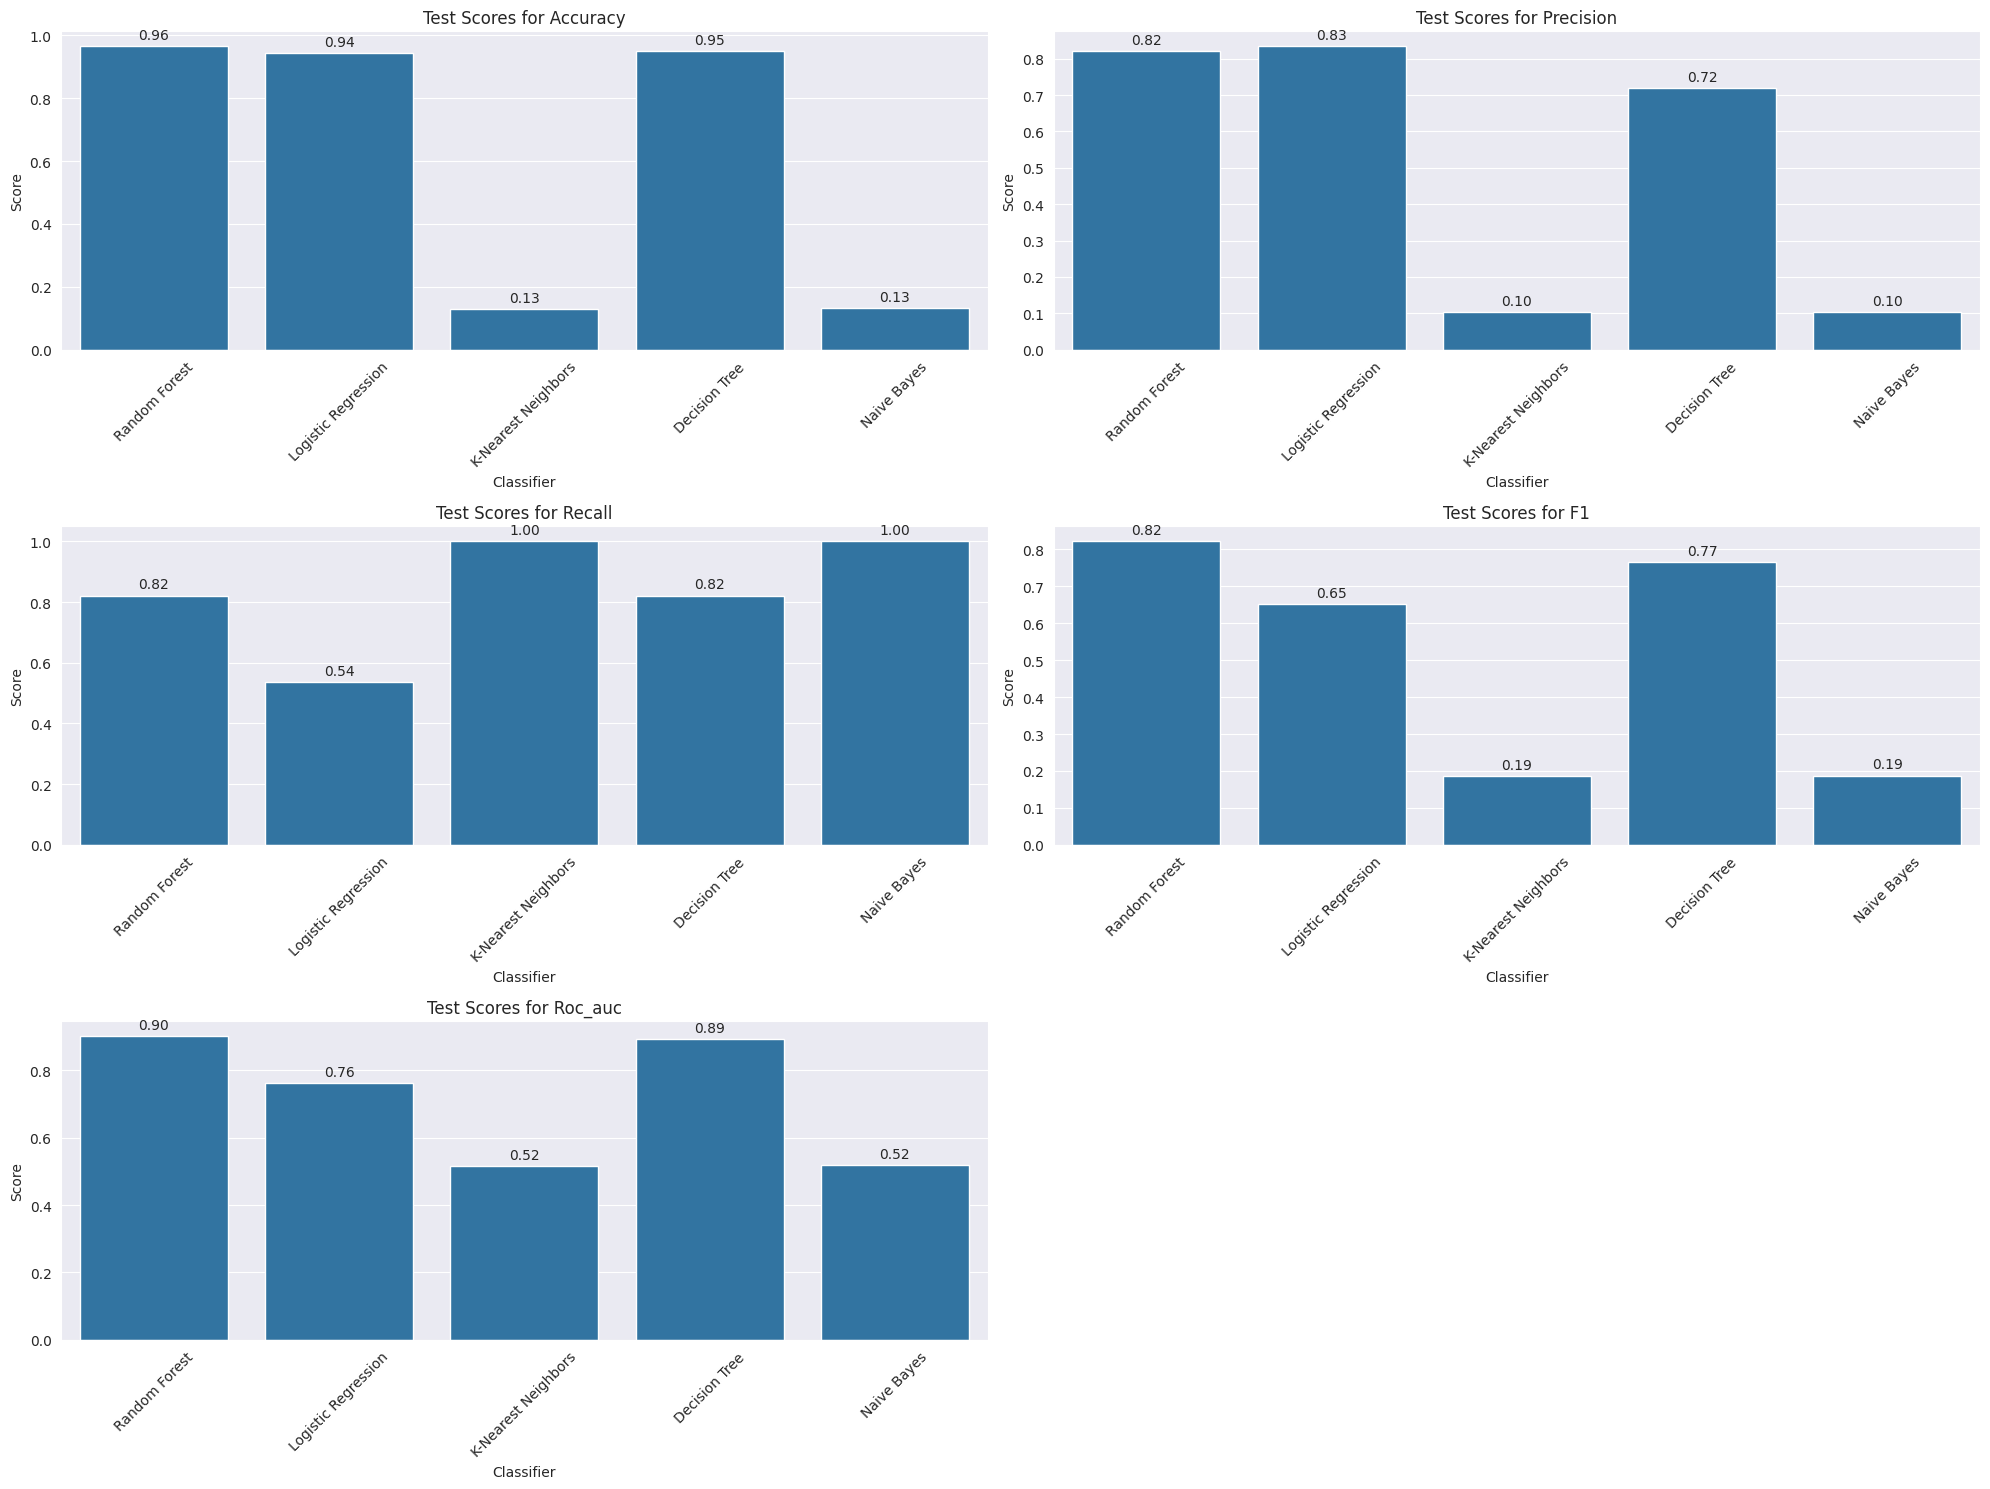

In [24]:
# Create a 2x2 subplot for the metrics
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Ensure the metrics are sorted for consistent plotting
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    print(metric)
    row = i // 2
    col = i % 2
    
    metric_data = df_pred10[df_pred10["Metric"] == metric]
    classifiers = metric_data["Classifier"].unique()
    means = metric_data.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    sns.barplot(x=classifiers, y=means, ax=ax)
    ax.set_title(f'Test Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(range(len(classifiers)))
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

# Hide the last (6th) subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_unique_10_pred.pdf')
#plt.show()


## both plotted together

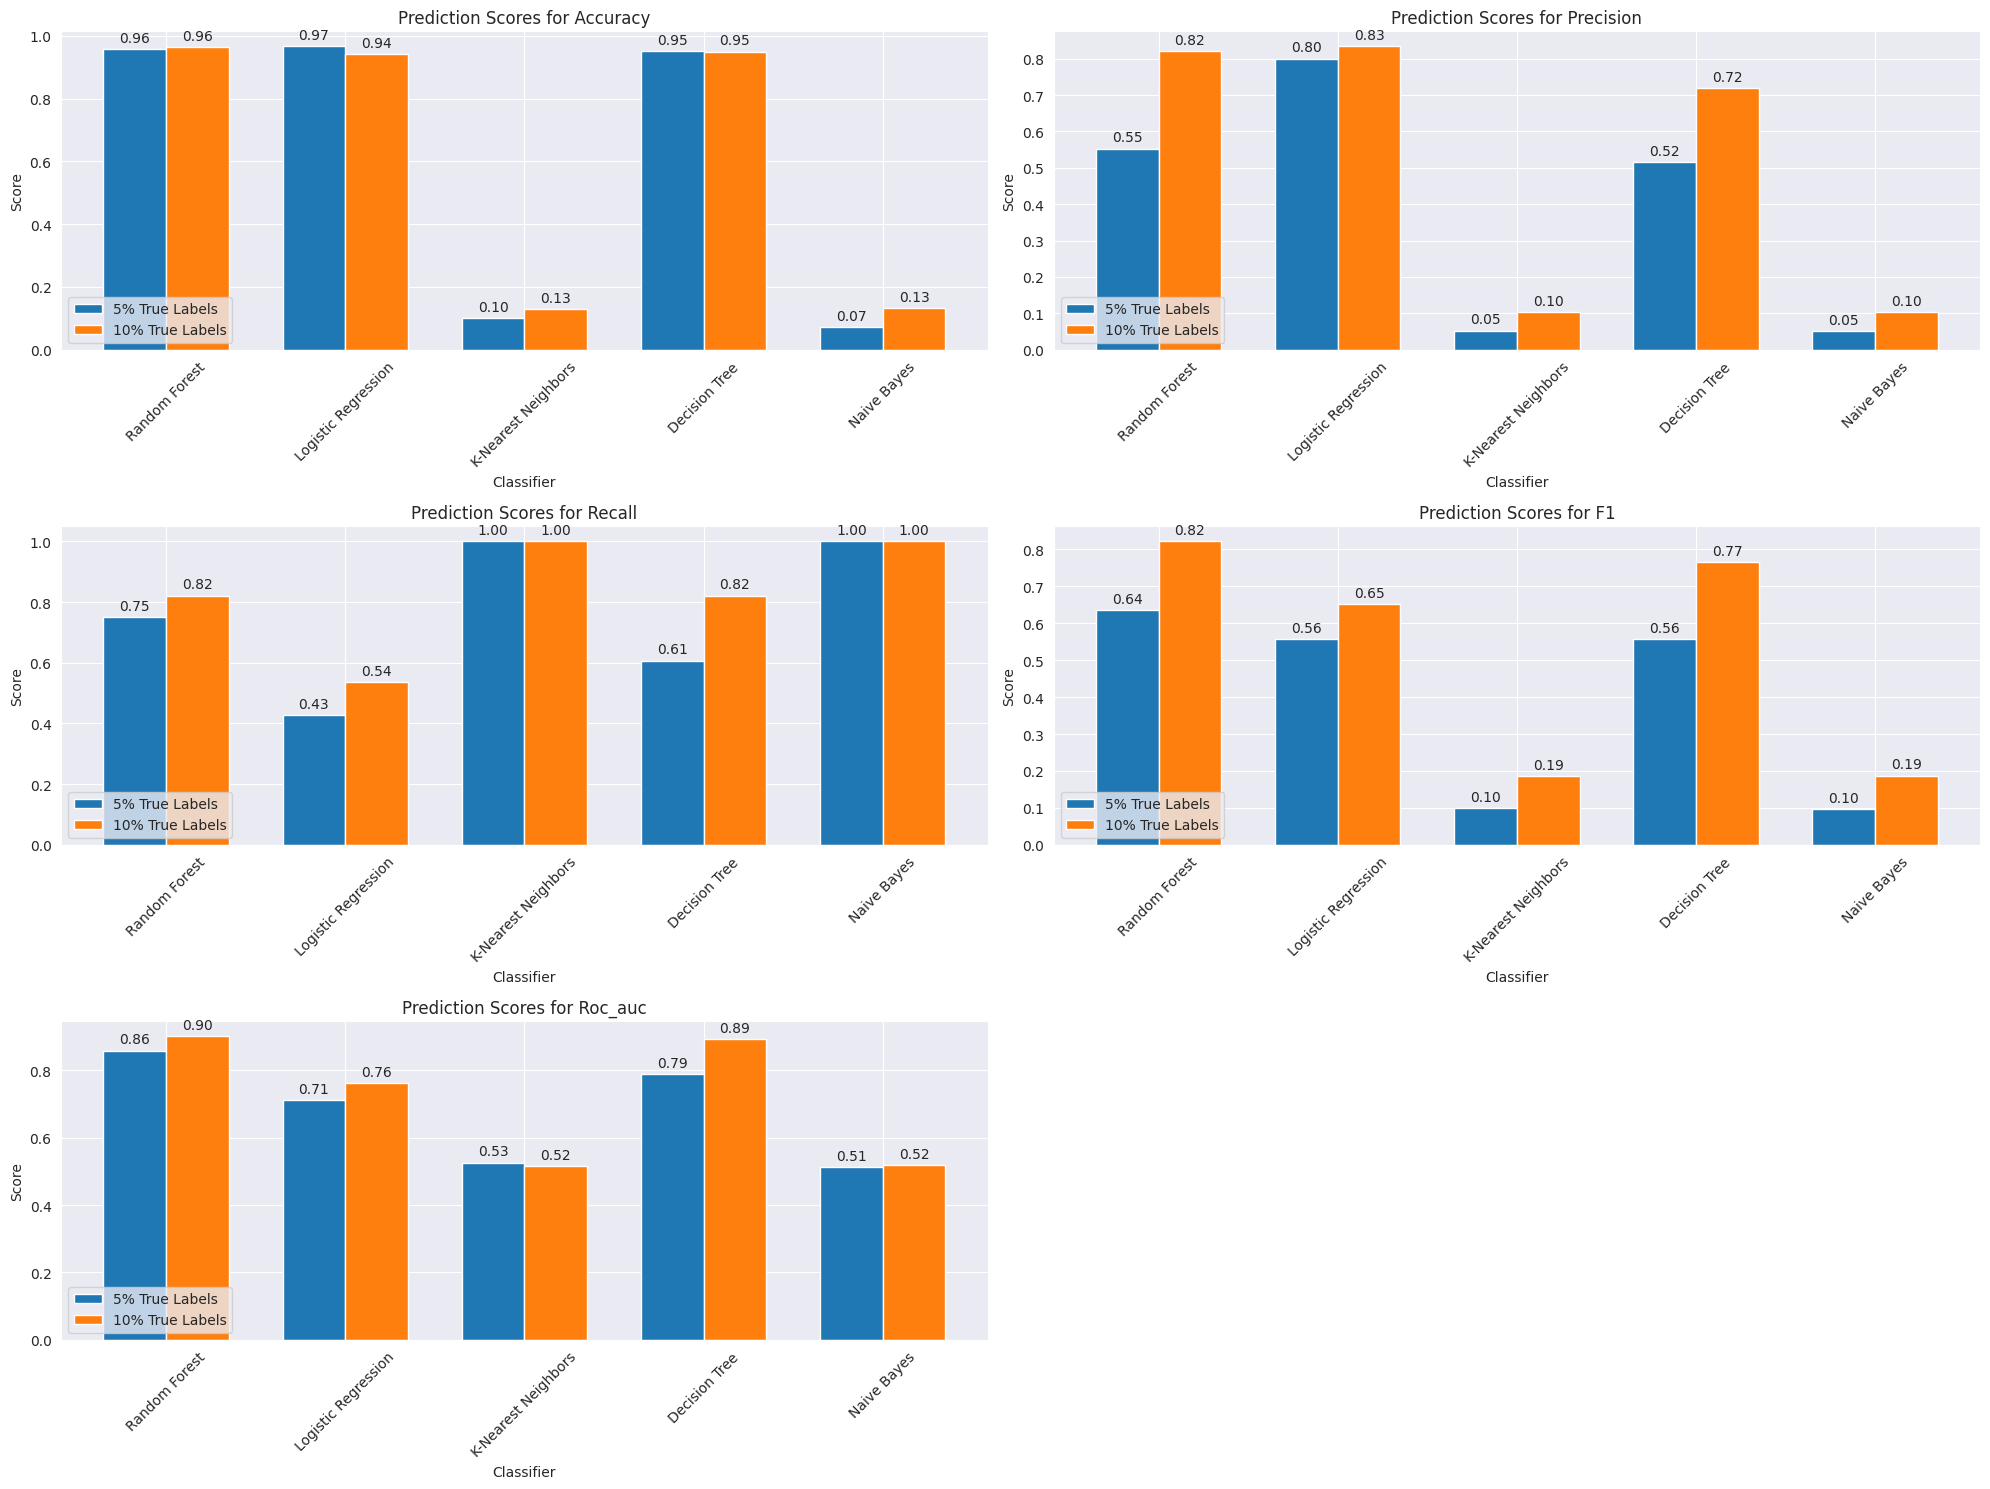

In [19]:
df_pred5["MetricType"] = "Metrics5"
df_pred10["MetricType"] = "Metrics10"

# Combine the two DataFrames
combined_df = pd.concat([df_pred5, df_pred10])

# Ensure the metrics are sorted for consistent plotting
metrics = sorted(combined_df["Metric"].unique())

# Create a 3x2 subplot
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

# Define bar width and positions
bar_width = 0.35
bar_positions = np.arange(len(df_pred5["Classifier"].unique()))

metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
# Loop through metrics and create bar plots
for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    
    metric_data = combined_df[combined_df["Metric"] == metric]
    
    # Separate data for Metrics5 and Metrics10
    data5 = metric_data[metric_data["MetricType"] == "Metrics5"]
    data10 = metric_data[metric_data["MetricType"] == "Metrics10"]
    
    classifiers = data5["Classifier"].unique()
    
    # Get mean scores
    means5 = data5.groupby("Classifier")["Score"].mean().reindex(classifiers)
    means10 = data10.groupby("Classifier")["Score"].mean().reindex(classifiers)
    
    ax = axs[row, col]
    
    # Plot bars
    bars1 = ax.bar(bar_positions - bar_width/2, means5, bar_width, label='5% True Labels')
    bars2 = ax.bar(bar_positions + bar_width/2, means10, bar_width, label='10% True Labels')
    
    ax.set_title(f'Prediction Scores for {metric.capitalize()}')
    ax.set_ylabel('Score')
    ax.set_xlabel('Classifier')
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(classifiers, rotation=45)
    
    # Annotate each bar with its score
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2., height),
                        xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')

    # Add legend
    ax.legend(loc='lower left')

# Hide the last (6th) subplot if there are less than 6 metrics
if len(metrics) < 6:
    fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()
plt.savefig('/home/sebastian/Documents/Masterarbeit/Plots/Metrics/ML/ML_classification_metrics_pred_combined.pdf')
plt.show()

In [20]:
combined_df

,Classifier,Metric,Score,MetricType
0,Random Forest,accuracy,0.957143,Metrics5
1,Random Forest,precision,0.552632,Metrics5
2,Random Forest,recall,0.750000,Metrics5
3,Random Forest,f1,0.636364,Metrics5
4,Random Forest,roc_auc,0.859023,Metrics5
5,Logistic Regression,accuracy,0.966071,Metrics5
6,Logistic Regression,precision,0.800000,Metrics5
7,Logistic Regression,recall,0.428571,Metrics5
8,Logistic Regression,f1,0.558140,Metrics5
9,Logistic Regression,roc_auc,0.711466,Metrics5


# TSNE

## 5% True label

In [15]:
df_other_embedded5 = pd.read_pickle('data/df_other_embedded5')

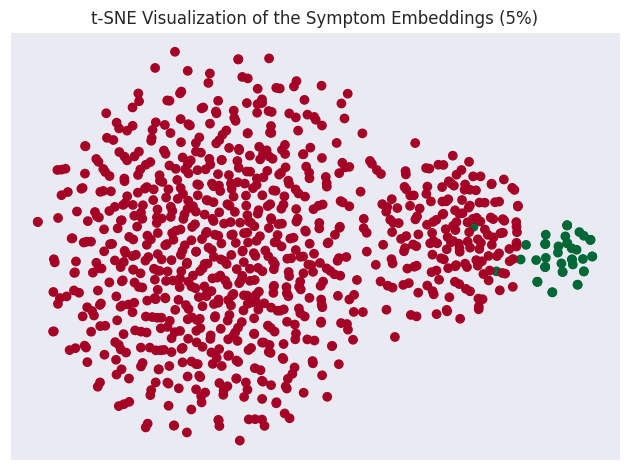

In [16]:
# Create a t-SNE visualization of the symptom columns
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

embedding_cols = []
for col in df_other_embedded5.columns:
    if 'symptom_embedding_' in col:
        embedding_cols.append(col)

assert(len(embedding_cols) == 50)

tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df_other_embedded5[embedding_cols])

# Create a scatter plot of the t-SNE embeddings
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df_other_embedded5['y_true'], cmap='RdYlGn')
plt.title('t-SNE Visualization of the Symptom Embeddings (5%)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_visualization_5.pdf')
plt.show()

## 10% true labels

In [17]:
df_other_embedded10 = pd.read_pickle('data/df_other_embedded10')

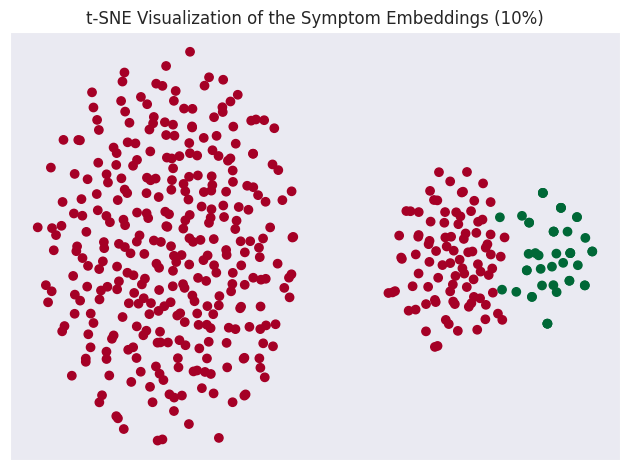

In [18]:
# Create a t-SNE visualization of the symptom columns
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

embedding_cols = []
for col in df_other_embedded10.columns:
    if 'symptom_embedding_' in col:
        embedding_cols.append(col)

assert(len(embedding_cols) == 50)

tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df_other_embedded10[embedding_cols])

# Create a scatter plot of the t-SNE embeddings
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df_other_embedded10['y_true'], cmap='RdYlGn')
plt.title('t-SNE Visualization of the Symptom Embeddings (10%)')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_visualization_10.pdf')
plt.show()

# PCA

## 5% True labels

In [19]:
df_other_embedded5 = pd.read_pickle('data/df_other_embedded5')

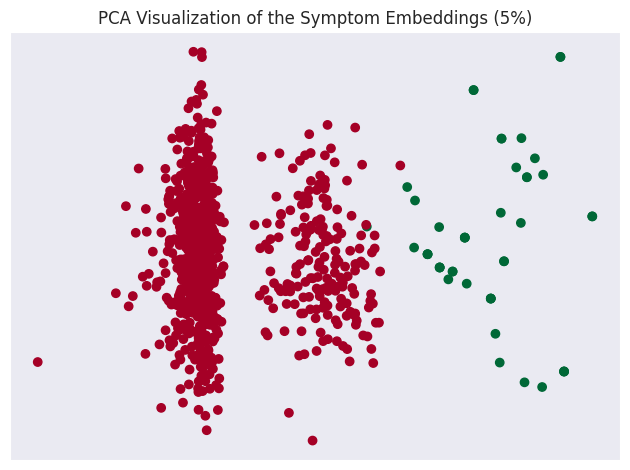

In [20]:
from sklearn.decomposition import PCA

pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df_other_embedded5[embedding_cols])

# Create a scatter plot of the PCA embeddings
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df_other_embedded5['y_true'], cmap='RdYlGn')
plt.title('PCA Visualization of the Symptom Embeddings (5%)')
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.tight_layout()
plt.savefig('../Plots/Embeddings/pca_visualization_5.pdf')
plt.show()

## 10% True labels

In [21]:
df_other_embedded10 = pd.read_pickle('data/df_other_embedded10')

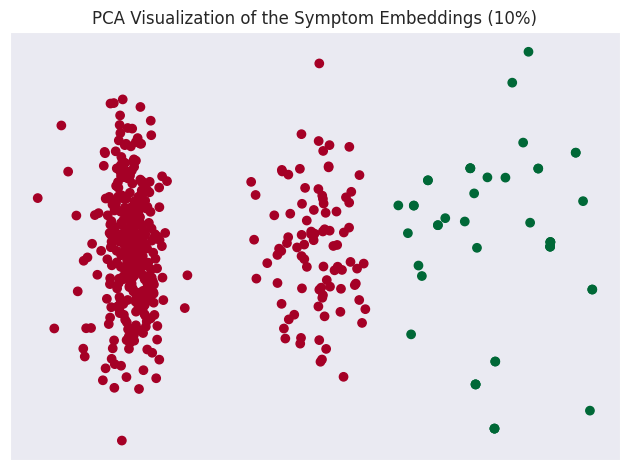

In [22]:
from sklearn.decomposition import PCA

pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df_other_embedded10[embedding_cols])

# Create a scatter plot of the PCA embeddings
plt.scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df_other_embedded10['y_true'], cmap='RdYlGn')
plt.title('PCA Visualization of the Symptom Embeddings (10%)')
plt.xticks([])
plt.yticks([])
# plt.legend()
plt.tight_layout()
plt.savefig('../Plots/Embeddings/pca_visualization_10.pdf')
plt.show()

# TSNE & PCA

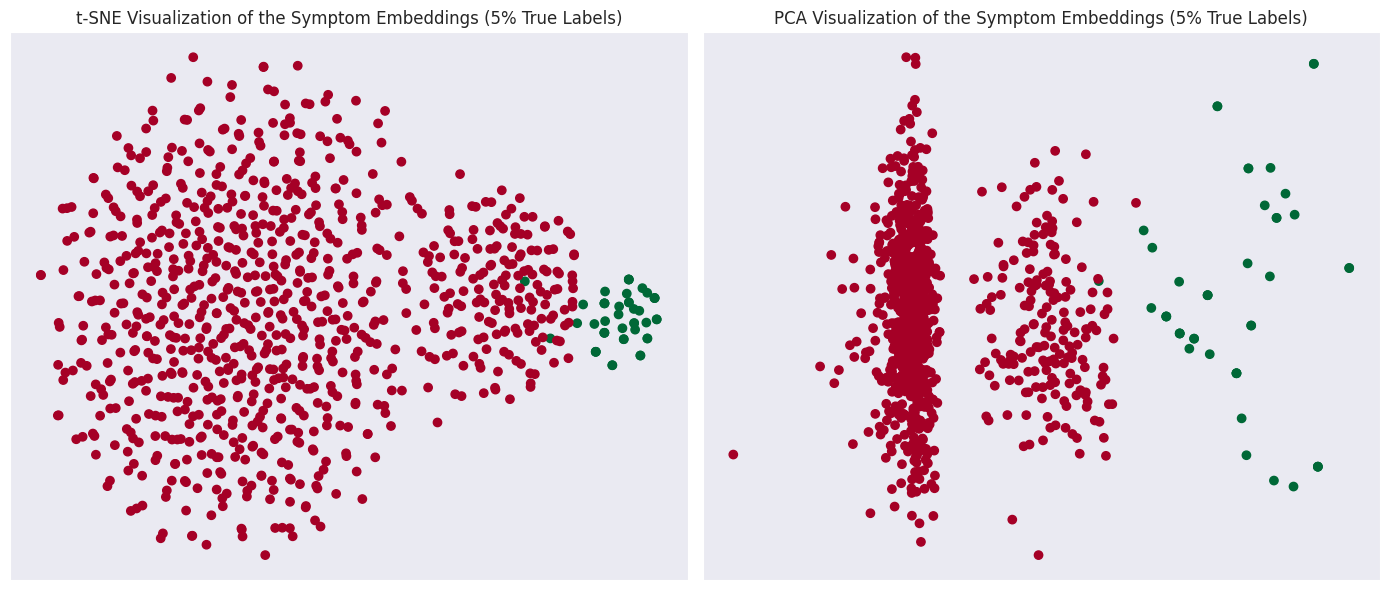

In [23]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Ensure we have the correct embedding columns
embedding_cols = [col for col in df_other_embedded5.columns if 'symptom_embedding_' in col]
assert(len(embedding_cols) == 50)

# Perform t-SNE embedding
tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df_other_embedded5[embedding_cols])

# Perform PCA embedding
pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df_other_embedded5[embedding_cols])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot t-SNE
axes[0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df_other_embedded5['y_true'], cmap='RdYlGn')
axes[0].set_title('t-SNE Visualization of the Symptom Embeddings (5% True Labels)')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot PCA
axes[1].scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df_other_embedded5['y_true'], cmap='RdYlGn')
axes[1].set_title('PCA Visualization of the Symptom Embeddings (5% True Labels)')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Adjust layout and save
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_pca_visualization_5.pdf')
plt.show()


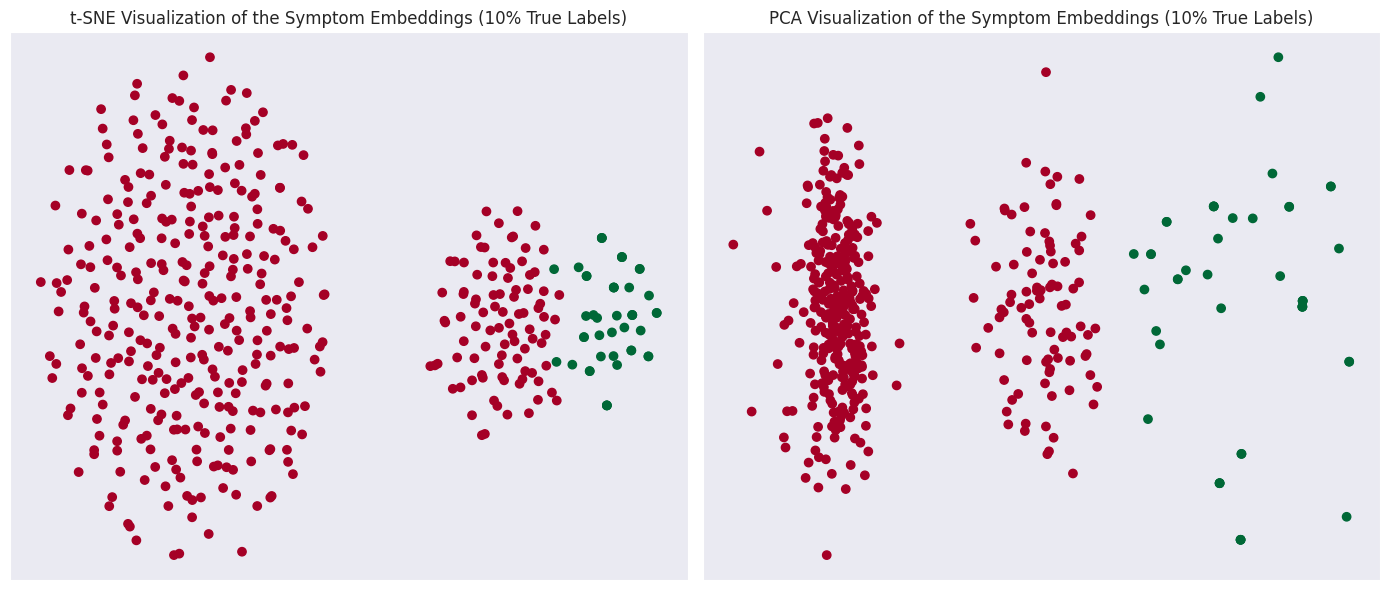

In [24]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Ensure we have the correct embedding columns
embedding_cols = [col for col in df_other_embedded10.columns if 'symptom_embedding_' in col]
assert(len(embedding_cols) == 50)

# Perform t-SNE embedding
tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df_other_embedded10[embedding_cols])

# Perform PCA embedding
pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df_other_embedded10[embedding_cols])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot t-SNE
axes[0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df_other_embedded10['y_true'], cmap='RdYlGn')
axes[0].set_title('t-SNE Visualization of the Symptom Embeddings (10% True Labels)')
axes[0].set_xticks([])
axes[0].set_yticks([])

# Plot PCA
axes[1].scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df_other_embedded10['y_true'], cmap='RdYlGn')
axes[1].set_title('PCA Visualization of the Symptom Embeddings (10% True Labels)')
axes[1].set_xticks([])
axes[1].set_yticks([])

# Adjust layout and save
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_pca_visualization_10.pdf')
plt.show()


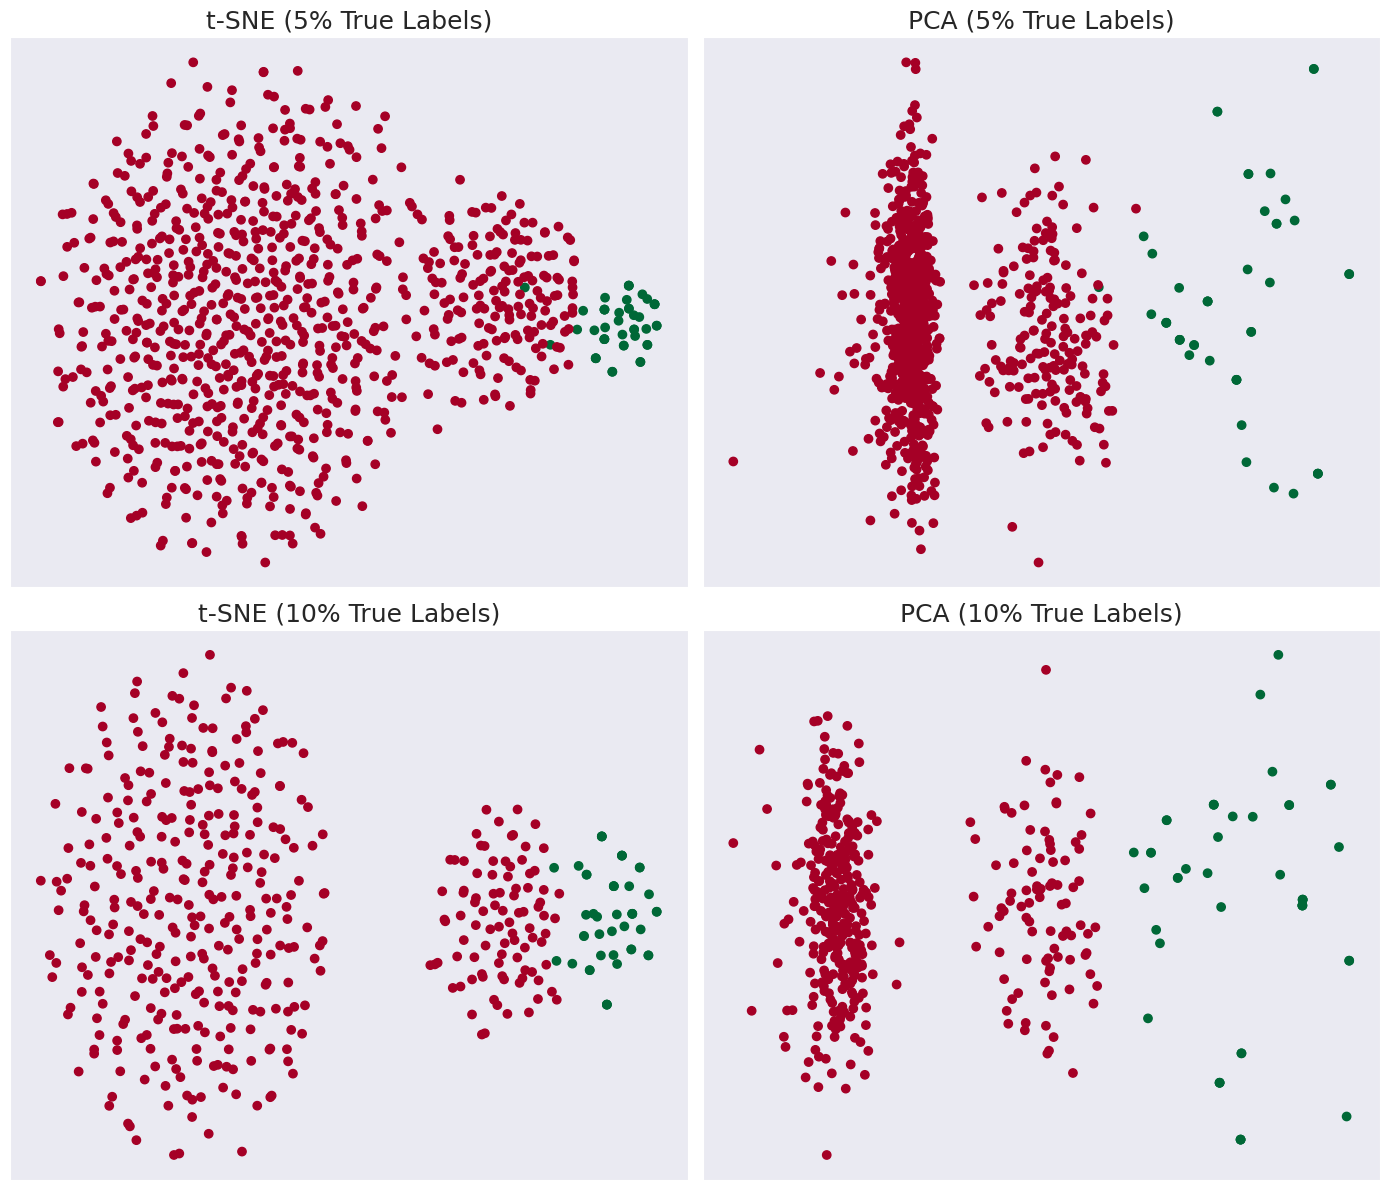

In [29]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Function to plot t-SNE and PCA embeddings
def plot_embeddings(df, title_suffix, axes, row):
    # Ensure we have the correct embedding columns
    embedding_cols = [col for col in df.columns if 'symptom_embedding_' in col]
    assert(len(embedding_cols) == 50)

    # Perform t-SNE embedding
    tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df[embedding_cols])

    # Perform PCA embedding
    pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df[embedding_cols])

    # Plot t-SNE
    axes[row, 0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df['y_true'], cmap='RdYlGn')
    axes[row, 0].set_title(f't-SNE ({title_suffix} True Labels)', fontsize=18)
    axes[row, 0].set_xticks([])
    axes[row, 0].set_yticks([])

    # Plot PCA
    axes[row, 1].scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df['y_true'], cmap='RdYlGn')
    axes[row, 1].set_title(f'PCA ({title_suffix} True Labels)', fontsize=18)

    axes[row, 1].set_xticks([])
    axes[row, 1].set_yticks([])

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot for 5% true labels
plot_embeddings(df_other_embedded5, '5%', axes, 0)

# Plot for 10% true labels
plot_embeddings(df_other_embedded10, '10%', axes, 1)

# Adjust layout and save
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_pca_visualization_combined.pdf')
plt.show()


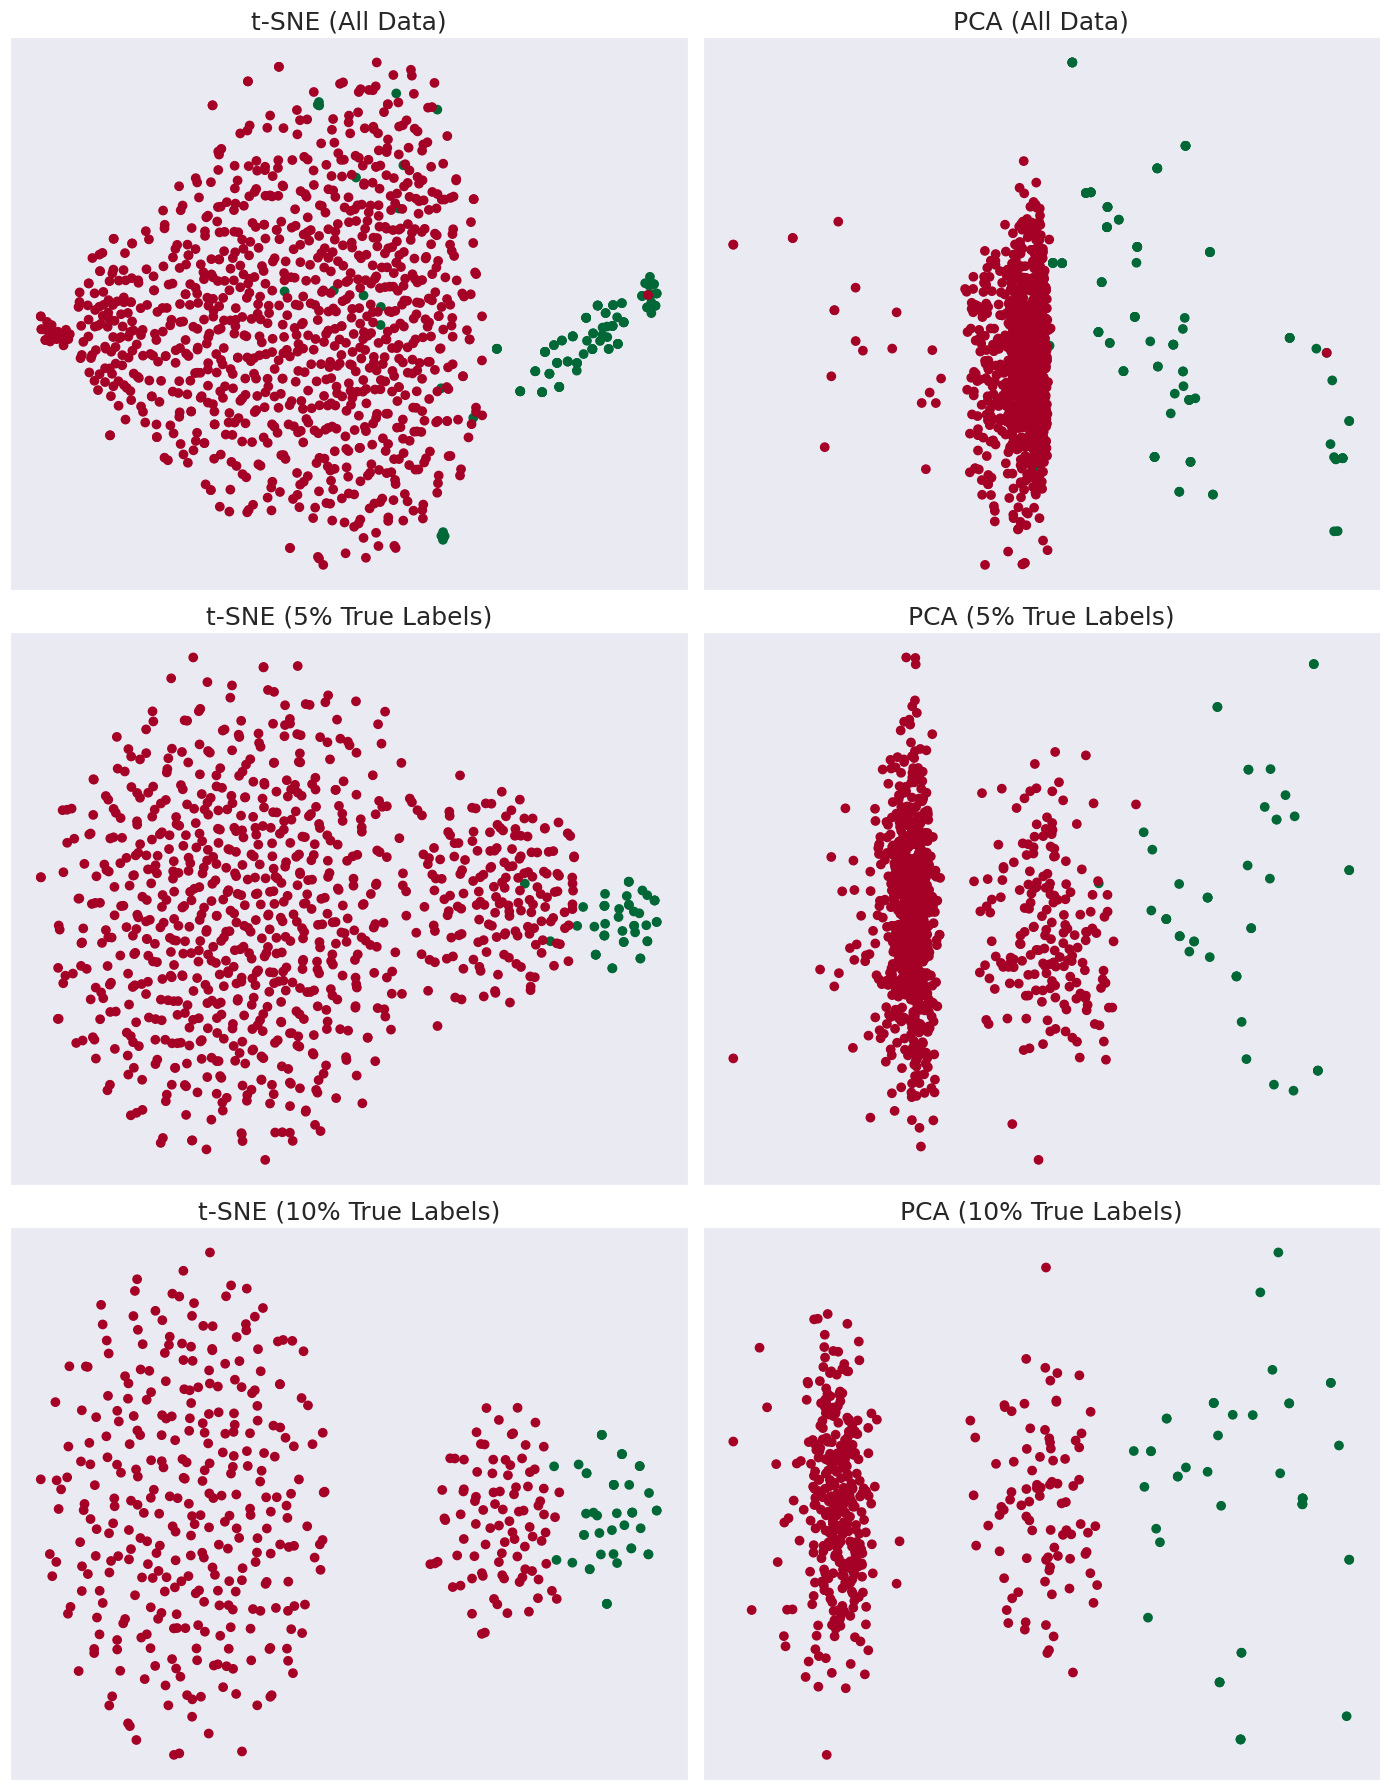

In [28]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Function to plot t-SNE and PCA embeddings
def plot_embeddings(df, title_suffix, axes, row):
    # Ensure we have the correct embedding columns
    embedding_cols = [col for col in df.columns if 'symptom_embedding_' in col]
    assert(len(embedding_cols) == 50)

    # Perform t-SNE embedding
    tsne_embedding = TSNE(n_components=2, random_state=0).fit_transform(df[embedding_cols])

    # Perform PCA embedding
    pca_embedding = PCA(n_components=2, random_state=0).fit_transform(df[embedding_cols])

    # Plot t-SNE
    axes[row, 0].scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], c=df['y_true'], cmap='RdYlGn')
    axes[row, 0].set_title(f't-SNE ({title_suffix} True Labels)', fontsize=18)
    axes[row, 0].set_xticks([])
    axes[row, 0].set_yticks([])

    # Plot PCA
    axes[row, 1].scatter(pca_embedding[:, 0], pca_embedding[:, 1], c=df['y_true'], cmap='RdYlGn')
    axes[row, 1].set_title(f'PCA ({title_suffix} True Labels)', fontsize=18)
    axes[row, 1].set_xticks([])
    axes[row, 1].set_yticks([])

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Plot for all data in the first row
embedding_cols = [col for col in df_embedded_all.columns if 'symptom_embedding_' in col]
assert(len(embedding_cols) == 50)

# Perform t-SNE embedding for all data
tsne_embedding_all = TSNE(n_components=2, random_state=0).fit_transform(df_embedded_all[embedding_cols])
axes[0, 0].scatter(tsne_embedding_all[:, 0], tsne_embedding_all[:, 1], c=df_embedded_all['y_true'], cmap='RdYlGn')
axes[0, 0].set_title('t-SNE (All Data)', fontsize=18)
axes[0, 0].set_xticks([])
axes[0, 0].set_yticks([])

# Perform PCA embedding for all data
pca_embedding_all = PCA(n_components=2, random_state=0).fit_transform(df_embedded_all[embedding_cols])
axes[0, 1].scatter(pca_embedding_all[:, 0], pca_embedding_all[:, 1], c=df_embedded_all['y_true'], cmap='RdYlGn')
axes[0, 1].set_title('PCA (All Data)', fontsize=18)
axes[0, 1].set_xticks([])
axes[0, 1].set_yticks([])

# Plot for 5% true labels in the second row
plot_embeddings(df_other_embedded5, '5%', axes, 1)

# Plot for 10% true labels in the third row
plot_embeddings(df_other_embedded10, '10%', axes, 2)

# Adjust layout and save
plt.tight_layout()
plt.savefig('../Plots/Embeddings/tsne_pca_all_visualization_combined.pdf')
plt.show()
